In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# upload the file
df=pd.read_csv("DATA_Customer-Churn.csv")

### Logistic Regression Model

In [3]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [4]:
def fill_null (df):
    mean_TotalCharges = round(df["TotalCharges"].mean())
    df["TotalCharges"] =  df["TotalCharges"].fillna(value=mean_TotalCharges)
    return df

In [5]:
df = fill_null(df)

In [6]:
churnData = df

In [7]:
# change categorical values in churn to numerical ones: No = 0 and Yes = 1
churnData.Churn = [i.replace("No", "0") for i in churnData.Churn]
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,0
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [8]:
churnData.Churn = [i.replace("Yes", "1") for i in churnData.Churn]
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,0
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,1
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,1


In [9]:
# deterining X and y values as well as spit into train and test data set
X=churnData.drop(['gender', "Partner", "Dependents", "PhoneService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "Churn"], axis=1)
y=churnData.Churn

In [10]:
# turning target value in actual numbers
y= y.apply(lambda x: 1 if x=="1" else 0)

In [11]:
# scaling the data and splitting it into train and test

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)


#X_train = pd.DataFrame(X_train, columns = X.columns)
#X_test  = pd.DataFrame(X_test , columns = X.columns)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
1695,0,54,70.70,3770.00
1095,0,1,80.55,80.55
3889,0,13,19.30,259.65
3667,1,24,96.55,2263.45
2902,1,6,74.10,450.90
...,...,...,...,...
3772,0,1,95.00,95.00
5191,0,23,91.10,2198.30
5226,0,12,21.15,306.05
5390,1,12,99.45,1200.15


In [ ]:
# Fit a logistic regression model on the training data.
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

In [ ]:
# Check the accuracy on the test data.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer

log = LogisticRegression() 


trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

### Apply the Decision Tree Model

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [14]:
# in this case we calibrate model in such that there is max. 3 layers
model = DecisionTreeRegressor(max_depth=3)

# AS THIS is a decision tree MODEL, we DONT need to SCALE the DATA
#trans = PowerTransform(), StandardScaler()
#trans.fit(X_train)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

In [15]:
# Building up the performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def performance_model(y_train, y_test, y_pred_train, y_pred_test):

    # Model validation y_train - y_pred_train
    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)

    MAE_train = mean_absolute_error(y_train,y_pred_train)
    MAE_test  = mean_absolute_error(y_test,y_pred_test)

    MSE_train = mean_squared_error(y_train,y_pred_train)
    MSE_test  = mean_squared_error(y_test,y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format


    df_train = pd.DataFrame({'Real_value': y_train, 'Predicted_value': y_pred_train})
    df_test  = pd.DataFrame({'Real_value': y_test,  'PRedicted_value': y_pred_test})

    return performance, df_train, df_test

In [16]:
# Visualize Model Performance
performance, _ ,_ = performance_model(y_train, y_test, y_pred_train, y_pred_test)
performance

,Error_metric,Train,Test
0,Mean error,0.00,0.01
1,Mean absolute error,0.30,0.30
2,Mean squared error,0.15,0.15
3,Root mean squared error,0.39,0.39
4,Mean absolute percentual error,inf,inf
5,R2,0.23,0.23


In [17]:
# Some test data
print(y_train.max())
print(y_train.min())
print(y_test.max())
print(y_test.min())
print(X_test.shape)
print(X_train.shape)

1
0
1
0
(2113, 4)
(4930, 4)


### Visualizing the decission tree¶

In [12]:
# showing the columns/feature names
for col in churnData.columns:
    print(col)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
MonthlyCharges
TotalCharges
Churn


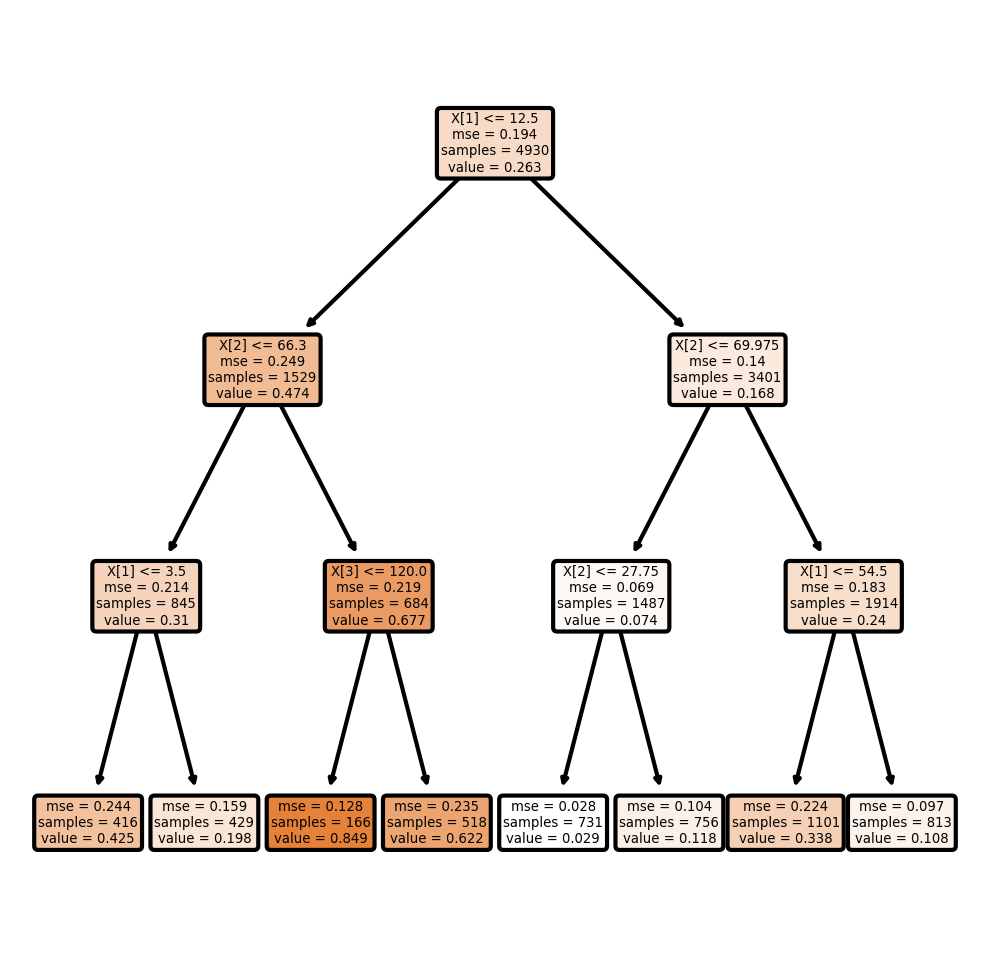

In [18]:
# Target variable is Churn, whereas 0 is stay and 1 is churn
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

plot_tree(model,filled = True, rounded=True)
plt.show()

### Check if there is difference with the classification route

,Error_metric,Train,Test
0,Accuracy,0.79,0.77
1,Precision,0.68,0.66
2,Recall,0.36,0.35


Confusion matrix for the train set
[[3414  832]
 [ 221  463]]


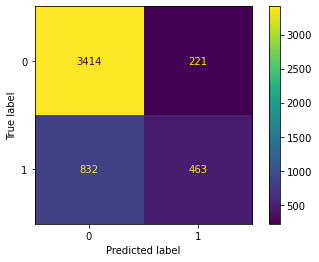



Confusion matrix for the test set
[[1437  375]
 [ 102  199]]


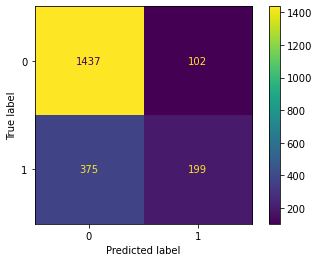

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

#prob_pred_test_dt = model.predict_proba(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

In [32]:
# see what are the column names
for col in X_train.columns:
    print(col)

SeniorCitizen
tenure
MonthlyCharges
TotalCharges


In [23]:
churnData["SeniorCitizen"]

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

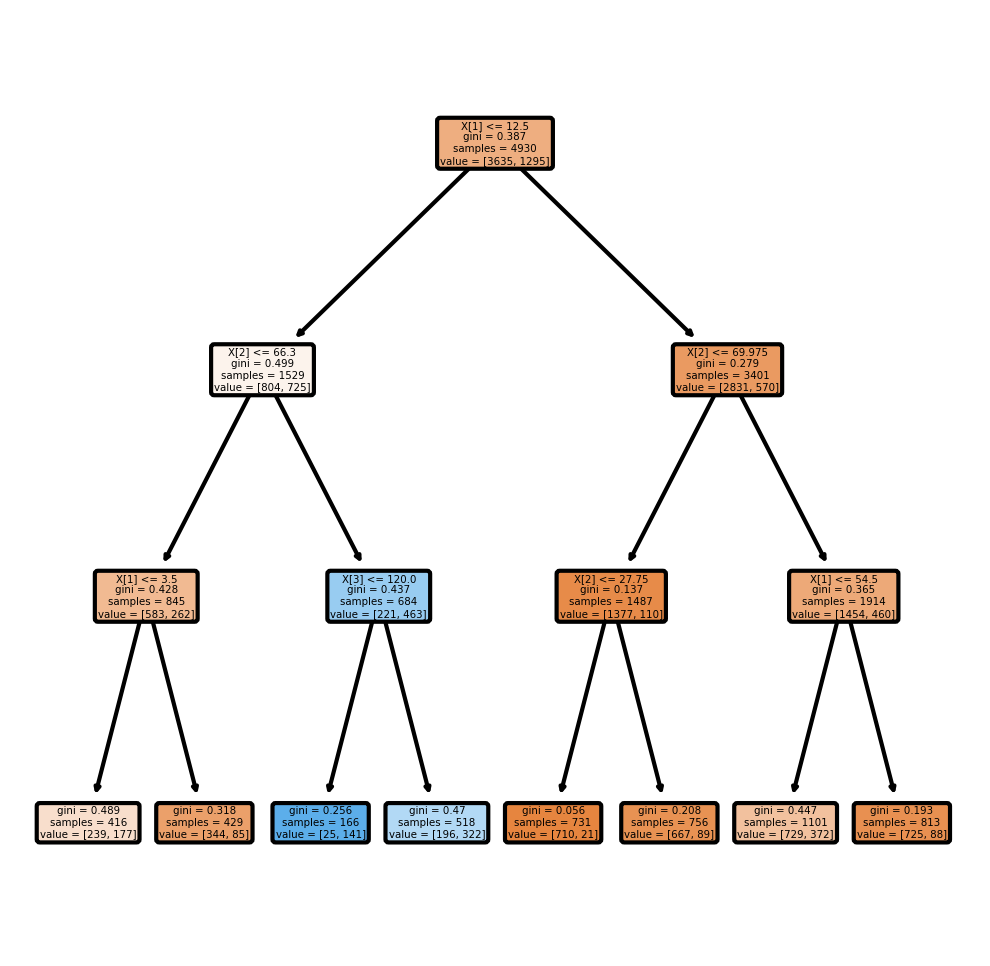

In [22]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

plot_tree(dt,filled = True, rounded=True)
plt.show()

### Cross Validation

In [56]:
# first you would need to do up or down sampling for a homogenious split between the two classes of a classification problem

from sklearn.model_selection import GridSearchCV # RandomSearchCV
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


# initialize model (no parameters) ->
neigh = KNeighborsClassifier()
# or use DecisionTreeClassifier and put (max_depth=3) into the param_grid section, coz that has to fit with the model

# define grid search
neigh_search = GridSearchCV(estimator=neigh,
                            param_grid={"n_neighbors":range(2,21),
                                        "weights":["uniform", "distance"]},
                            #scoring="r2",
                            cv=10) # K-Fold cross validation -> cv = K-Folds

# all possible metrics here:
# from sklearn.metrics import SCORERS
# sorted(SCORERS.keys())

In [58]:
neigh_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 21),
                         'weights': ['uniform', 'distance']})

In [59]:
# here we see the average score per single combination (i.e. 19 x 2(uniform, distance)) that was each iterated 10 times
neigh_search.cv_results_["mean_test_score"]

array([0.75010142, 0.70831643, 0.74198783, 0.73346856, 0.76308316,
       0.73833671, 0.76206897, 0.74320487, 0.77058824, 0.74908722,
       0.77099391, 0.75476673, 0.77180527, 0.75862069, 0.77383367,
       0.75943205, 0.77565923, 0.76288032, 0.77748479, 0.7653144 ,
       0.77545639, 0.76592292, 0.77728195, 0.76774848, 0.77667343,
       0.76754564, 0.77586207, 0.76815416, 0.77809331, 0.7673428 ,
       0.77667343, 0.768357  , 0.77586207, 0.7673428 , 0.77829615,
       0.77079108, 0.77931034, 0.77302231])

In [60]:
# uses the best model that was found in your grid search and applies it to your test data
y_predict1 = neigh_search.predict(X_test)
y_predict1

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

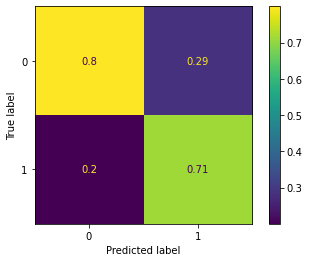

In [61]:
# visualize the above
plot_confusion_matrix(neigh_search, X_test, y_test,normalize="pred");

In [54]:
# Classification report
print(classification_report(y_test, neigh_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1539
           1       0.71      0.37      0.48       574

    accuracy                           0.79      2113
   macro avg       0.76      0.66      0.68      2113
weighted avg       0.78      0.79      0.76      2113



In [44]:
# data is quite imbalanced, maybe that is the reason for the suboptimal results above
y_test.value_counts()

0    1539
1     574
Name: Churn, dtype: int64

In [28]:
neigh_search.cv_results_["params"]

[{'n_neighbors': 2, 'weights': 'uniform'},
 {'n_neighbors': 2, 'weights': 'distance'},
 {'n_neighbors': 3, 'weights': 'uniform'},
 {'n_neighbors': 3, 'weights': 'distance'},
 {'n_neighbors': 4, 'weights': 'uniform'},
 {'n_neighbors': 4, 'weights': 'distance'},
 {'n_neighbors': 5, 'weights': 'uniform'},
 {'n_neighbors': 5, 'weights': 'distance'},
 {'n_neighbors': 6, 'weights': 'uniform'},
 {'n_neighbors': 6, 'weights': 'distance'},
 {'n_neighbors': 7, 'weights': 'uniform'},
 {'n_neighbors': 7, 'weights': 'distance'},
 {'n_neighbors': 8, 'weights': 'uniform'},
 {'n_neighbors': 8, 'weights': 'distance'},
 {'n_neighbors': 9, 'weights': 'uniform'},
 {'n_neighbors': 9, 'weights': 'distance'},
 {'n_neighbors': 10, 'weights': 'uniform'},
 {'n_neighbors': 10, 'weights': 'distance'},
 {'n_neighbors': 11, 'weights': 'uniform'},
 {'n_neighbors': 11, 'weights': 'distance'},
 {'n_neighbors': 12, 'weights': 'uniform'},
 {'n_neighbors': 12, 'weights': 'distance'},
 {'n_neighbors': 13, 'weights': 'unif

In [29]:
cv_res = neigh_search.cv_results_
sorted(zip(cv_res["mean_test_score"], cv_res["params"]), reverse=True)

[(0.20032528202304575, {'n_neighbors': 20, 'weights': 'uniform'}),
 (0.1999845313857097, {'n_neighbors': 19, 'weights': 'uniform'}),
 (0.19783310368947105, {'n_neighbors': 18, 'weights': 'uniform'}),
 (0.19639791125424236, {'n_neighbors': 17, 'weights': 'uniform'}),
 (0.19523530620321247, {'n_neighbors': 16, 'weights': 'uniform'}),
 (0.19311368886107108, {'n_neighbors': 15, 'weights': 'uniform'}),
 (0.18990948330783747, {'n_neighbors': 14, 'weights': 'uniform'}),
 (0.18647045711635993, {'n_neighbors': 13, 'weights': 'uniform'}),
 (0.18135252320580583, {'n_neighbors': 12, 'weights': 'uniform'}),
 (0.17851277808345356, {'n_neighbors': 11, 'weights': 'uniform'}),
 (0.1701302182951286, {'n_neighbors': 10, 'weights': 'uniform'}),
 (0.16700336788056674, {'n_neighbors': 9, 'weights': 'uniform'}),
 (0.15989788486915754, {'n_neighbors': 8, 'weights': 'uniform'}),
 (0.1597926226585697, {'n_neighbors': 20, 'weights': 'distance'}),
 (0.15861222338658149, {'n_neighbors': 19, 'weights': 'distance'})

In [ ]:
neigh